### Pengantar

Kita mungkin sering mendengar mengenai bagaimana banyak bisnis berkembang dan maju dengan cepat karena inovasi, baik itu inovasi di sisi produk ataupun bisnis.

Salah satu inovasi bisnis di bidang ritel adalah mencari asosiasi atau hubungan antar produk dari data transaksi penjualan yang bertujuan untuk:

* dipaketkan dan dijual bersamaan.
* memberikan rekomendasi produk kepada seseorang.
* menyusun rak display.
* menyusun halaman produk e-commerce.

Semua hal ini bertujuan untuk meningkatkan penjualan sekaligus memecahkan masalah inventory – karena produk yang tidak begitu laku jika dipasangkan dengan tepat akan lebih menarik dan punya kemungkinan besar dibeli dalam satu paket. Proses ini merupakan proses analisa yang disebut dengan Market Basket Analysis (MBA). 

Source : https://youtu.be/SN62jcxTpQ4

### Tujuan dari Market Basket Analysis

Dari video di atas (lihat source video), kita dapat ambil kesimpulan bahwa **Market Basket Analysis** bertujuan untuk mencari rekomendasi paket produk - berdasarkan pola unik dari data transaksi pelanggan - yang dapat meningkatkan penjualan.

Lalu apa yang bisa kita lakukan dengan rekomendasi paket ini? Dari video tersebut kita bisa melakukan hal seperti menyusun tampilan produk pada website e-commerce atau susunan produk pada rak toko. 

![item_n_trans_2](images/item_n_trans_2.png)

### Contoh Code Market Basket Analysis di R

Penerapan Market Basket Analysis (MBA) di R dapat menggunakan algoritma apriori – yang merupakan salah satu algoritma terpopuler di area machine learning - pada package arules. Arules sendiri adalah singkatan dari association rules - kategori machine learning. Untuk menjalankan algoritma ini diperlukan dibutukan dua data, yaitu data produk dan data transaksi.

Berikut adalah contoh code di R yang jika dijalankan akan memunculkan contoh data transaksinya seperti berikut.

In [5]:
#Menggunakan library arules
library(arules)

#Membaca transaksi dari file data_transaksi.txt
transaksi <- read.transactions(file="dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)

transaksi

transactions in sparse format with
 10 transactions (rows) and
 4 items (columns)

In [6]:
#Menampilkan data transaksi dengan print dan inspect 
inspect(transaksi)

     items                        transactionID
[1]  {Pet Food, Sirup, Teh Celup} #01          
[2]  {Gula, Teh Celup}            #02          
[3]  {Pet Food, Sirup}            #03          
[4]  {Sirup, Teh Celup}           #04          
[5]  {Gula, Sirup, Teh Celup}     #05          
[6]  {Pet Food, Teh Celup}        #06          
[7]  {Pet Food, Sirup, Teh Celup} #07          
[8]  {Teh Celup}                  #08          
[9]  {Gula, Teh Celup}            #09          
[10] {Gula, Pet Food, Sirup}      #10          


Dan hasil pemaketan produk yang disarankan terlihat seperti berikut .

In [7]:
#Menghasilkan model Market Basket Analysis
mba <- apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))

#Menampilkan paket produk
inspect(subset(mba, lift>1))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                      rhs        support confidence coverage lift    
[1] {Pet Food}            => {Sirup}    0.4     0.8000000  0.5      1.333333
[2] {Sirup}               => {Pet Food} 0.4     0.6666667  0.6      1.333333
[3] {Gula, Pet Food}      => {Sirup}    0.1     1.0000000  0.1  

Hasil pada baris pertama dan kedua menunjukkan produk "Pet Food" cocok dipasangkan dengan "Sirup".

**Market Basket Analysis (MBA)** adalah teknik analisa yang digunakan oleh bisnis di bidang ritel untuk mencari asosiasi produk yang kuat, atau dengan kata lain menemukan paket produk yang bisa berdampak besar pada penjualan.

Algoritma yang bisa digunakan di R untuk melakukan MBA ini adalah apriori dari package arules. Data yang diperlukan hanya dua, yaitu data transaksi dan data produk.

Dengan paket produk yang ditemukan, bisnis dapat melakukan beberapa hal berikut:

* Membuat paket produk dengan penawaran menarik.
* Menyusun produk dengan asosiasi kuat secara berdampingan pada rak toko.
* Menyusun tampilan katalog website e-commerce.
* Memberikan rekomendasi produk.

### Algoritma Apriori dan Association Rules

Bicara mengenai pemaketan produk sebenarnya adalah mencari produk-produk yang memiliki hubungan atau asosiasi kuat di dalam transaksi. Hubungan "kuat" disini akan dilihat berdasarkan proporsi jumlah kemunculan kombinasi produk yang akan dipaketkan dengan keseluruhan transaksi.

Mari kita lihat contoh pada gambar berikut. Nomor transaksi (1 s/d 5) menunjukkan nomor struk belanja. Sedangkan gambar buah yang berwarna menunjukkan produk atau item yang dibeli.

![transaksi](images/transaksi.jfif)

Pada gambar terlihat ada dua transaksi dimana terdapat buah rambutan dan pisang. Dan dimana terdapat pisang maka ada rambutan, dan sebaliknya. Ini menunjukkan hubungan atau asosiasi yang kuat diantara dua produk buah ini.

Apel sendiri terdapat di seluruh transaksi, sehingga ada atau tidak ada produk buah lain tidak menjadi "masalah" buat Apel. Istilahnya, untuk laku maka Apel jual mahal... tidak memerlukan apapun jadi pendampingnya. Bisa dikatakan, tidak ada asosiasi antara apel dengan produk apapun. Jeruk, apel dan rambutan ada dua kali muncul, tapi jeruk bisa muncul sendirian juga bersama apel. Sehingga kombinasi paket jeruk, apel dan rambutan walaupun ada asosiasi tapi tidak sekuat apel dan rambutan.

Nah, terlihat kan ada kombinasi-kombinasi yang perlu diperiksa? Untuk 4 item dari contoh transaksi, dengan minimal 2 item per transaksi maka ada 9 kombinasi yang perlu dicek. Dengan makin banyaknya item maka kombinasi juga akan berkembang cepat.

Sebagai gambaran, jika terdapat 1.000 item, maka kemungkinan terdapat jutaan kombinasi yang harus diproses. Jumlah sebesar ini tentunya tidak bisa manual dan butuh bantuan algoritma komputer untuk memprosesnya.

Dan algoritma yang bisa digunakan adalah algoritma **apriori** yang merupakan algoritma di kategori **association rules** pada literatur machine learning. Algoritma ini akan menghasilkan kombinasi-kombinasi yang kemudian disusun dalam bentuk rule "Jika membeli ini.... maka akan juga membeli... ".

Ada cukup banyak penerapan dari association rules , seperti di dunia cyber security untuk mendeteksi intrusi jaringan, di bidang sales marketing untuk pemaketan produk, mencari pola pemakaian web, dan lain-lain.

### Menampilkan Kombinasi dari Contoh Transaksi "Kecil"

Pada contoh kasus data_transaksi, terdapat 10 transaksi seperti berikut.

![trans1](images/trans1.PNG)

Untuk mendapatkan gambaran berapa kombinasi produk yang mungkin terjadi, dapat dilakukan dengan menjalankan code berikut sehingga akan tampil hasil sebagai berikut.

In [11]:
inspect(apriori(transaksi, parameter = list(support=.1, minlen=2, target='frequent itemsets')))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.1      2
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [9 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    items                        support count
[1] {Gula, Pet Food}             0.1     1    
[2] {Gula, Sirup}                0.2     2    
[3] {Gula, Teh Celup}            0.3     3    
[4] {Pet Food, Sirup}            0.4     4    
[

Terlihat ada sembilan kombinasi produk dengan nilai support adalah rasio dari kombinasi tersebut terhadap keseluruhan transaksi.

Sebagai contoh, kombinasi {Pet Food, Sirup} memiliki support 0.4 yang artinya kombinasi ini terdapat di 4 dari 10 transaksi yang tercatat.

### Menampilkan Kombinasi dari Transaksi "Besar"

Selanjutnya akan dilakukan proses membaca file dimana di dalamnya terdapat 100 transaksi - yang jika ditampilkan sebagian hasilnya akan terlihat sebagai berikut. Ini lebih mencerminkan transaksi pada dunia nyata - yang jumlah transaksinya bahkan bisa sampai jutaan - dibandingkan dengan data contoh sebelumnya.

In [12]:
#Menggunakan library arules
library(arules)

#Membaca transaksi dari file data_transaksi2.txt
transaksi <- read.transactions(file="dataset/data_transaksi2.txt", format="single", sep="\t", cols=c(1,2), skip=1)

#Menampilkan jumlah kombinasi dari produk yang terdapat pada daftar transaksi yang ada
inspect(apriori(transaksi, parameter = list(support=.03, minlen=2, target='frequent itemsets')))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.03      2
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[70 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [56 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [1248 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
       items                               support count
[1]    {Shampo Biasa,                                   
        Tas Makeup}                          0.031    31
[2]    {Tank Top,                                  

Keseluruhan transaksi ini merupakan kombinasi dari 70 item produk. Dan kalau dilakukan analisa dengan syarat support 0.03 (minimal muncul 30 kali dari 1000 transaksi) maka jumlah kombinasi yang dihasilkan adalah 1248. Semakin kecil support yang dimasukkan akan semakin banyak kombinasi yang muncul.

Dengan jumlah kombinasi yang sedemikian besar untuk dianalisa, akan sulit bagi jika proses analisa lakukan secara manual. Inilah alasan kenapa proses ini perlu diotomatisasi dengan bantuan algoritma.

### Algoritma Apriori

Algoritma apriori adalah salah satu algoritma yang merupakan penerapan praktis dari **Market Basket Analysis (MBA)**. Algoritma ini digunakan untuk menganalisa banyaknya kombinasi produk yang terjadi di dalam transaksi ritel, yang akan sulit dan lama jika dilakukan secara manual.

Secara teknis, algoritma apriori akan mencari tingkat asosiasi antar item di dalam banyak kombinasi kelompok data secara otomatis. Kombinasi ini juga bisa disusun dengan suatu aturan (rule) asosiasi "Jika membeli ini produk A maka akan membeli produk B", sehingga algoritma ini dikategorikan sebagai **Association Rules** di ranah machine learning.

Dengan menemukan paket produk yang asosiasinya kuat, seorang data scientist dapat menyarankan kepada bisnis agar dapat melakukan berbagai action item seperti membuat paket produk dengan penawaran khusus, mendekatkan produk-produk tersebut saling berdekatan dalam satu rak, mengeluarkan rekomendasi produk di sistem e-commerce, mengurangi masalah stok, dan lain-lain.

Sebelumnya telah melihat sekilas tentang output pengolahan algoritma apriori dalam bentuk kombinasi seperti berikut.

![trans3](images/trans3.PNG)

Walaupun tampilan cukup ringkas, tapi banyak konsep dan peristilahan yang mungkin cukup "memusingkan", seperti lhs (left hand side), rhs (right hand side), item seperti Pet Food, itemset seperti {Gula, Pet Food} dan rule seperti {Pet Food} => {Sirup}, dan lain-lain.

Untuk penjelasan ringkasnya bisa di cek pada video berikut : https://youtu.be/i1DB5gVN8VQ

#### Penjelasan Konsep

Beberapa konsep-konsep fundamental yang sangat penting mengenai item, itemset dan rule dapat dilihat pada gambar berikut :

![trans4](images/trans4.PNG)

* **Item** adalah produk tunggal yang terdapat dalam suatu transaksi.
    - Contoh: Pet Food, Sirup, Gula, dan Teh Celup.
    
* **Itemset** adalah kombinasi satu atau lebih item yang terdapat dalam satu transaksi.
    - Contoh: {Pet Food}, {Gula, Pet Food}, {Sirup}, dan lain-lain. 
    
* **Rule** adalah pernyataan hubungan antar Itemset. Biasanya dapat diformulasikan menjadi "Jika membeli itemset A, maka akan membeli itemset B".
    - Contoh: {Pet Food} => {Sirup}, {Pet Food, Teh Celup} => {Sirup}, dan lain-lain. 

#### Penjelasan Transaksi

![trans5](images/trans5.PNG)

Output ini adalah tampilan dari dataset yang berjumlah sepuluh transaksi, dengan dua kolom yang terdiri dari:
* Kolom pertama adalah itemset yang berisi item-item yang dibeli pada transaksi tertentu.
* Kolom kedua berisi kode struk transaksi yang menjadi penanda unik untuk tiap transaksi.

#### Contoh Dataset

![trans6](images/trans6.png)

Data yang ada pada file ini memiliki dua kolom sebagai berikut:

* **Kode Transaksi**: Kode transaksi, ini bisa dianggap nomor struk.
* **Item**: Nama item yang dibeli.

Jika divisualisasikan dari data transaksi, akan terlihat sebagai berikut.

![trans7](images/trans7.png)

### Membaca File sebagai Data Frame

Data frame adalah tipe data yang banyak digunakan oleh berbagai algoritma di R. Untuk pembahasan Association Rules, pembacaan data sebagai data frame akan menyulitkan, karena harus menghitung manual atau menggunakan fungsi-fungsi lain pada data frame, oleh sebab itu terdapat function khusus pada package arules untuk membaca data transaksi sehingga memudahkan untuk membaca data transaksinya.

### Membaca File sebagai Transaction

Tipe data lain yang lebih tepat untuk membaca data transaksi adalah bernama transactions dan berasal dari package R bernama arules. Function yang digunakan untuk menghasilkan tipe data ini adalah read.transactions.

Berikut adalah contoh penggunaan untuk membaca dataset transaksi

In [13]:
read.transactions(file="dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)

transactions in sparse format with
 10 transactions (rows) and
 4 items (columns)

### Keterangan code:

* **File** : Parameter lokasi file yang bisa berasal dari url di web satau lokal. Dalam hal ini, file data_transaksi.txt berlokasi pada folder lokal bernama dataset.
* dataset/data_transaksi.txt: lokasi dataset yang terdapat pada folder local bernama 'dataset'.
* **format**: Format bisa "single" atau "basket".
    - "single" artinya tiap item transaksi dituliskan terpisah baris demi baris, dan ini cocok dengan format dari file yang digunakan.
    - "basket" artinya seluruh item per transaksi ditulis per baris.
* **sep**: separator character atau karakter pemisah antar kolom, untuk file ini karakter pemisahnya adalah tab atau dalam notasi di R ditulis dengan "\t".
* **cols**: indeks dari kolom-kolom yang digunakan. Untuk format single maka kolom harus dua saja, kolom pertama adalah kode transaksi sedangkan kolom kedua menunjukkan item transaksi. Penulisan c(1,2) artinya kolom pertama dan kedua yang digunakan.
* **skip**: jumlah baris yang dilewati sebelum mulai membaca data. Untuk dataset diatas, baris pertama adalah header dan tidak diperlukan, jadi dimasukkan 1 sebagai input.

### Keterangan hasil:

* **transactions in sparse format**: Ini artinya transaksi dalam bentuk sparse (tersebar). Ini mungkin akan lebih jelas ketika divisualiasikan dalam bentuk matrix.
* **10 transactions (rows)**: dataset yang digunakan secara total memiliki 10 transaksi. Ada informasi rows atau baris disini, ini bukan berarti data yang digunakan ada 10 baris pada file data_transaksi. Karena pada kenyataannya, file memiliki 23 baris data. 
* **4 items (columns)**: dataset yang digunakan secara total memiliki 4 item unik.

### Menampilkan Daftar Item Transaksi

Item-item yang terdapat pada objek transactions dapat dilihat pada komponen **itemInfo** dengan didahului aksesor **@**, jadi ditulis **@iteminfo**. Ini bermanfaat untuk melihat daftar unik item yang terdapat pada data transaksi yang sedang di analisa. 

Dalam hal ini, hasil read.transactions disimpan dalam sebuah variable bernama transaksi. 

In [14]:
transaksi <- read.transactions(file="dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)

Dengan disimpannya objek transaction ke dalam variable transaksi, maka bisa di analisa lebih lanjut. Daftar item dari objek transaksi ini bisa dilihat dengan penulisan berikut.

In [15]:
transaksi@itemInfo

labels
<chr>
Gula
Pet Food
Sirup
Teh Celup


Terlihat ada empat item yang terdapat di seluruh data transaksi, yaitu Gula, Pet Food, Sirup dan Teh Celup.

### Menampilkan Daftar Kode Transaksi

Sepuluh transaksi yang telah dibaca oleh read.transactions dapat dilihat detil kode-kodenya dengan menggunakan komponen **itemsetInfo** dengan aksesor **@**, atau lengkapnya ditulis dengan **@itemsetInfo**. Daftar ini bisa bermanfaat sebagai basis untuk menganalisa atau melakukan validasi dengan data yang ada pada sistem ritel.

Berikut adalah contoh penulisan untuk mengakses daftar kode transaksi dari variable transaksi.

In [16]:
transaksi@itemsetInfo

transactionID
<chr>
#01
#02
#03
#04
#05
#06
#07
#08
#09


Terlihat ada sepuluh kode transaksi di seluruh transaksi, yaitu kode #01 sampai dengan #10.

Catatan: #01, #02 dan seterusnya bukan format tampilan dari R, tapi hasil dari pembacaan file transaksi.

### Tampilan Transaksi dalam bentuk Matrix
 
Ada kalanya data ingin dilihat dalam bentuk sebaran item pada keseluruhan transaksi. Dengan menggunakan daftar output berupa teks akan terasa sangat panjang. Sebagai salah satu solusinya, dapat dilakukan dengan menampilkan sebaran ini dalam bentuk matrix dua dimensi, dimana baris matrix urutan item dan pada kolom adalah item transaksi.

Matrix dari objek transaction dapat dilihat dari komponen **data** menggunakan aksesor **@**, ditulis lengkap sebagai **@data**.

In [17]:
transaksi@data

4 x 10 sparse Matrix of class "ngCMatrix"
                        
[1,] . | . . | . . . | |
[2,] | . | . . | | . . |
[3,] | . | | | . | . . |
[4,] | | . | | | | | | .

#### Berikut adalah penjelasan hasilnya:

* **4 x 10** :  artinya terdapat 4 item dan 10 transaksi.
* **[1,] s/d [4,]** : artinya index yang mewakili tiap item dalam transaksi. Index ini sebenarnya mencerminkan urutan dari hasil berikut:

![trans8](images/trans8.PNG)

    dengan demikian, item Gula diwakili [1,], Pet Food diwakili [2,], dan seterusnya.
* Simbol tanda titik **.**  menunjukkan item tidak ada di transaksi.
* Simbol garis lurus **|**  menunjukkan bahwa item ada di transaksi.

Untuk lebih jelasnya berikut adalah penulisan ulang dari output di atas, dalam hal ini garis-garis pada transaksi item ke-1 (Gula) ditandai warna biru.

![trans9](images/trans9.PNG)

Tanda garis ini terdapat pada transaksi ke 2, 5, 9, dan 10. Hal ini dapat dibuktikan dengan melihat kembali output dari file data frame berikut - dimana item Gula diberi penanda warna biru.

![trans10](images/trans10.PNG)

Dengan penjelasn ini, arti matrix ini yang dapat membantu menganalisa distribusi item-item pada seluruh transaksi yang ada dengan lebih ringkas.

### Item Frequency

Setelah mengetahui bagaimana caranya menampilkan informasi daftar transaksi, kode transaksi, item dan distribusi item pada transaksi, untuk mengetahui item dengan jumlah kemunculannnya pada keseluruhan transaksi. Informasi ini disebut sebagai item frequency.

Untuk menghasilkan informasi ini dapat menggunakan fungsi **itemFrequency** dengan input objek transaction, dan hasilnya berupa named vector atau vector yang bisa diakses dengan nama.

Berikut adalah contoh penggunaan fungsi itemFrequency.

In [18]:
itemFrequency(transaksi)

Gula  Pet Food     Sirup Teh Celup 
      0.4       0.5       0.6       0.8

Hasil ini menunjukkan bahwa frekuensi kemunculan Gula adalah 0.4 atau 40 persen dari porsi seluruh transaksi yang ada, Pet Food menempati 50 persen, dan seterusnya.

Lalu bagaimana jika bukan persentase yang ingin ditampilkan, tapi jumlah item dalam angka sebenarnya?

Tentunya bisa dilakukan, yakni dengan cara menambahkan parameter **type="absolute"** ke dalam fungsi itemFrequency sebagai berikut.

In [19]:
itemFrequency(transaksi, type="absolute")

Gula  Pet Food     Sirup Teh Celup 
        4         5         6         8

Ini artinya Gula memiliki kemunculan 4 kali dari seluruh transaksi yang ada, Pet Food muncul sebanyak 5 kali, Sirup sebanyak 6 kali, dan Teh Celup sebanyak 8 kali.

Fungsi **itemFrequency** ini sangat penting untuk membantu menganalisa transaksi yang lebih kompleks dimana item yang terlibat lebih banyak dan transaksi yang terjadi lebih besar.

### Statistik Top 3

Statistik sederhana untuk menjawab pertanyaaan seperti "Mana 3 item yang memiliki jumlah terbanyak di seluruh transaksi?" tidak bisa langsung dilakukan dengan satu fungsi di R, tapi perlu penggabungan beberapa perintah dimana salah satunya adalah fungsi **sort**.

Dimulai dari menjalankan code yang telah ada pada code editor. Code ini berfungsi untuk menampilkan data_item yang merupakan variable yang nilainya merupakan hasil pemanggilan fungsi itemFrequency.

In [21]:
data_item <- itemFrequency(transaksi, type="absolute")
print(data_item)

     Gula  Pet Food     Sirup Teh Celup 
        4         5         6         8 


In [22]:
#Melakukan sorting pada data_item
data_item <- sort(data_item, decreasing = TRUE)
print(data_item)

Teh Celup     Sirup  Pet Food      Gula 
        8         6         5         4 


Fungsi sort untuk nengurutkan item dari jumlah terbesar ke terkecil, dan disimpan kembali ke variable data_item

Fungsi sort di atas menerima input variable data_item, dan karena permintaan untuk mengurutkan dari jumlah terbesar ke terkecil maka perlu ditambahkan parameter **decreasing = TRUE**. 

Catatan: jika ingin tetap mengurutkan item dari jumlah terkecil ke terbesar maka parameter ini tidak perlu digunakan, atau kalau tetap mau digunakan maka diisi dengan nilai **FALSE**.

Terlihat item sudah terurut, tapi masih ada empat item ketimbang tiga item yang diinginkan. Untuk mengambil tiga item saja bisa menggunakan konstruksi index **[1:3]** dari variable **data_item** yang artinya mengambil index pertama sampai dengan ketiga.

In [23]:
#Mengambil 3 item pertama
data_item <- data_item[1:3]
print(data_item)

Teh Celup     Sirup  Pet Food 
        8         6         5 


Dari tampilan ini, output telah berhasil mengambil tiga item dengan jumlah terbanyak. Tahap terakhir adalah merubah hasil yang berupa vector ini ke dalam data frame. 

Dua kolom dari data frame akan diberi nama "Nama Produk" dan "Jumlah".

In [24]:
#Konversi data_item menjadi data frame dengan kolom Nama_Produk dan Jumlah
data_item <- data.frame("Nama Produk"=names(data_item), "Jumlah"=data_item, row.names=NULL)
print(data_item)

  Nama.Produk Jumlah
1   Teh Celup      8
2       Sirup      6
3    Pet Food      5


Berikut adalah penjelasan detil dari perintah tersebut:

* **data.frame**: fungsi untuk membuat suatu data frame.
* **"Nama Produk" <- names(data_item)**: adalah nama kolom pertama ("Nama Produk") yang diisi dengan nama atau label dari vector **data_item** (Teh Celup, Sirup, Pet Food)
* **"Jumlah" <- data_item**: adalah nama kolom kedua ("Jumlah") yang diisi dengan nilai-nilai vector data_item (8, 6, 5)
* **row.names = NULL**: artinya tidak memerlukan label pada tiap baris data frame, kalau parameter ini tidak ada maka output yang akan kita dapatkan jadi seperti berikut.

![trans11](images/trans11.PNG)

### Output Statistik Top 3 Sebagai File

Selain sebagai tampilan pada console, output dari sistem dapat berupa file.

Dari hasil sebelumnya, telah didapatkan statistik top 3 dari jumlah item terbanyak dalam bentuk data frame. Dalam hal ini dapat dituliskan secara langsung menggunakan fungsi **write.csv**, selengkapnya adalah sebagai berikut.

In [25]:
write.csv(data_item, file="top3_item_retail.txt", eol = "\r\n")

Dalam script diatas, file diberi nama **"top_3_item.retail_txt"** yang diisikan ke dalam parameter file. Terdapat tambahan parameter eol = "\r\n", yang berguna untuk menghasilkan file yang bisa ditampilkan di Windows dengan baik.

Catatan: parameter terakhir ini bisa Anda abaikan pada saat mengerjakan proyek.

### Grafik Item Frequency

Selain tampilan transaksi dalam bentuk matrix, distribusi transaksi dapat juga dilihat dari tiap item dalam bentuk grafik dengan menggunakan fungsi **itemFrequencyPlot**.

Perintahnya sebagai berikut.

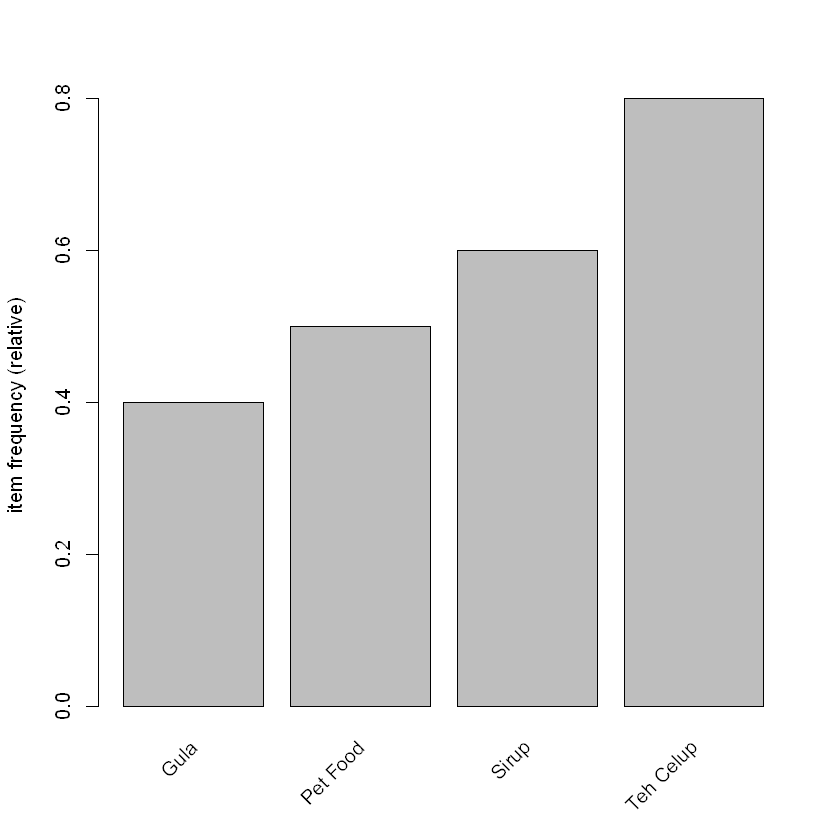

In [26]:
#Tampilan item frequency plot
itemFrequencyPlot(transaksi)

Dari distribusi ini, terlihat item Teh Celup paling laku dan Gula paling sedikit transaksinya.

### Melihat Itemset per Transaksi dengan Inspect

Tiap transaksi terdiri atas beberapa item atau itemset.

Untuk melihat notasi **itemset** yang lebih baik dan mudah dimengerti dapat menggunakan function **inspect**.

Penggunaan function ini juga sederhana. Seperti terlihat pada contoh berikut.

In [27]:
inspect(transaksi)

     items                        transactionID
[1]  {Pet Food, Sirup, Teh Celup} #01          
[2]  {Gula, Teh Celup}            #02          
[3]  {Pet Food, Sirup}            #03          
[4]  {Sirup, Teh Celup}           #04          
[5]  {Gula, Sirup, Teh Celup}     #05          
[6]  {Pet Food, Teh Celup}        #06          
[7]  {Pet Food, Sirup, Teh Celup} #07          
[8]  {Teh Celup}                  #08          
[9]  {Gula, Teh Celup}            #09          
[10] {Gula, Pet Food, Sirup}      #10          


Ini merupakan daftar itemset dari sepuluh transaksi. Kolom **items** berisi item-item yang terjadi pada transaksi, dan **transactionID** berisi kode transaksi. Sebagai contoh, pada kode transaksi #01 terdapat itemset yang terdiri dari Pet Food, Sirup dan Teh Celup.

Format penulisan tiap itemset terdiri dari notasi kurung kurawal pembuka dan penutup, yang di dalamnya terdapat daftar item yang dipisahkan tanda koma untuk tiap itemnya.

### Menghasilkan Rules dengan Apriori

Untuk menghasilkan rule ini, kita gunakan fungsi **apriori** dengan syntax berikut.

In [28]:
apriori(transaksi)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 3 rules 

Banyak sekali informasi dari output yang dihasilkan. Perhatikan baris terakhir dimana tertulis **"set of 3 rules"**. Ini artinya dengan fungsi apriori ini, didapatkan tiga rules. 

### Melihat Rules dengan fungsi inspect

Selain transaksi, fungsi inspect juga dapat digunakan untuk melihat isi dari association rules yang dihasilkan oleh fungsi apriori.

In [29]:
mba <- apriori(transaksi)
inspect(mba)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                 rhs         support confidence coverage lift     count
[1] {}               => {Teh Celup} 0.8     0.8        1.0      1.000000 8    
[2] {Pet Food}       => {Sirup}     0.4     0.8        0.5      1.333333 4    
[3] {Gula, Pet Food} => {Sirup}     0.1     1.0        0.1 

Terlihat kalau variable mba menyimpan tiga rules dengan kolom-kolom berikut:

* **lhs**: itemset di bagian kiri (left hand side)
* **rhs**: itemset di bagian kanan (right hand side)
* **support**, **confidence** dan **lift**: metrik-metrik yang digunakan untuk menilai kualitas dari rule. Umumnya semakin besar semakin baik.

Kalau fokus kembali ke itemset lhs dan rhs untuk product packaging, terlihat rule kedua yaitu **{Pet Food} => {Sirup}** cukup menarik.

Kenapa bisa dikatakan menarik?

Karena support 0.4 menunjukkan bahwa kombinasi ini terdapat di 40 persen poulasi - berarti 4 dari 10 transaksi untuk dataset yang digunakan. Nilai lift juga di atas 1, yang artinya rule ini memiliki asosiasi tinggi antar itemset yang terdapat di rule ini.

Sedangkan **{} => {Teh Celup}** tidak menarik karena hanya berisi satu item. Rule sisanya, **{Gula, Peta Food} = > {Sirup}** terlalu unik - ini ditunjukkan dengan support 0.1 (10%) yang artinya hanya terdapat di 1 dari 10 transaksi.

Apa makna dari rule jika ingin diaplikasikan?

Artinya ada beberapa opsi action item yang bisa dilakukan:

* rekomendasikan kepada setiap pelanggan yang membeli Pet Food untuk membeli Sirup.
* rak display Pet Food dan Sirup bisa didekatkan.
* Pet Food dan Sirup dipaketkan bersama dan dijual dengan harga khusus.

### Filter RHS

Dari hasil inspect objek mba yang bertipe association rules diatas, dapat diketahui bahwa objek tersebut mengandung banyak informasi termasuk itemset yang terdapat di left hand side dan right hand side.

Ini penting untuk bisnis, misalkan untuk inventory. Kita ingin menjawab, adakah item yang kurang laku sebelumnya ada di dalam itemset dari rules yang dihasilkan oleh apriori? Jika ada, mungkin saya bisa paketkan bersama sehingga kemungkinan besar terjual lebih banyak.

Untuk melakukan ini dapat dengan cara melakukan filter atau subsetting dari rules. Banyak cara, salah satunya adalah dengan menggunakan gabungan function inspect, subset dan operator %in% dengan format berikut.

    inspect(subset(rules, rhs %in% teks_atau_vector_teks_yang_mewakili_item))

In [31]:
inspect(subset(mba, rhs %in% "Sirup"))

    lhs                 rhs     support confidence coverage lift     count
[1] {Pet Food}       => {Sirup} 0.4     0.8        0.5      1.333333 4    
[2] {Gula, Pet Food} => {Sirup} 0.1     1.0        0.1      1.666667 1    


Ini artinya dilakukan proses filter rules dimana pada rhs memiliki item "Sirup".

### Filter LHS

Penggunaan filter lhs kurang lebih sama dengan filter rhs.

Berikut adalah contoh perintah inspect untuk filter lhs dengan item Gula.

In [32]:
inspect(subset(mba, lhs %in% "Gula"))

    lhs                 rhs     support confidence coverage lift     count
[1] {Gula, Pet Food} => {Sirup} 0.1     1          0.1      1.666667 1    


### Filter LHS dan RHS

Untuk melakukan filter pada kedua sisi dapat dilakukan dengan menggunakan operator **&** untuk AND dan operator **|** untuk OR.

Berikut adalah contoh perintah inspect untuk filter lhs dengan item Pet Food dan rhs dengan item Sirup.

In [33]:
inspect(subset(mba, lhs %in% "Pet Food" & rhs %in% "Sirup"))

    lhs                 rhs     support confidence coverage lift     count
[1] {Pet Food}       => {Sirup} 0.4     0.8        0.5      1.333333 4    
[2] {Gula, Pet Food} => {Sirup} 0.1     1.0        0.1      1.666667 1    


### Penjelasan Support, Confidence, dan Lift

Source : https://youtu.be/BzGFCoNqlSs

### Menghasilkan Rules dengan Parameter Support dan Confidence

Pada output diatas, diperoleh hasil tiga rules dengan function apriori secara default tanpa parameter apapun. Padahal sebenarnya dapat dimasukkan parameter tambahan berupa support dan confidence.

Tanpa parameter tambahan tersebut, maka nilai minimum support adalah 0.1 dan minimum confidence adalah 0.8 sebagai filter dari function apriori.

Berikut adalah perintah untuk menghasilkan kembali association rules dengan function apriori, tapi dalam hal ini dengan tambahan parameter minimum support dan confidence masing-masing bernilai 0.1 dan 0.5.

In [38]:
mba<-apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))
mba

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 16 rules 

Perhatikan pada akhir baris output, terdapat 16 rule. Lebih banyak dibandingkan eksekusi perintah apriori sebelumnya yang hanya menghasilkan 3 rule.

### Inspeksi Rules Yang Dihasilkan

In [39]:
inspect(mba)

     lhs                      rhs         support confidence coverage lift     
[1]  {}                    => {Pet Food}  0.5     0.5000000  1.0      1.0000000
[2]  {}                    => {Sirup}     0.6     0.6000000  1.0      1.0000000
[3]  {}                    => {Teh Celup} 0.8     0.8000000  1.0      1.0000000
[4]  {Gula}                => {Sirup}     0.2     0.5000000  0.4      0.8333333
[5]  {Gula}                => {Teh Celup} 0.3     0.7500000  0.4      0.9375000
[6]  {Pet Food}            => {Sirup}     0.4     0.8000000  0.5      1.3333333
[7]  {Sirup}               => {Pet Food}  0.4     0.6666667  0.6      1.3333333
[8]  {Pet Food}            => {Teh Celup} 0.3     0.6000000  0.5      0.7500000
[9]  {Sirup}               => {Teh Celup} 0.4     0.6666667  0.6      0.8333333
[10] {Teh Celup}           => {Sirup}     0.4     0.5000000  0.8      0.8333333
[11] {Gula, Pet Food}      => {Sirup}     0.1     1.0000000  0.1      1.6666667
[12] {Gula, Sirup}         => {Pet Food}

Terlihat dengan merubah parameter pada function apriori, maka akan didapatkan jumlah rules yang berbeda

### Filter LHS dan RHS (2)

Dengan 16 rules yang dihasilkan, akan ada lebih banyak pilihan untuk melakukan filter lhs dan rhs.

Berikut adalah contoh untuk filter dimana lhs atau rhs keduanya memiliki item Teh Celup.

In [41]:
inspect(subset(mba, lhs %in% "Teh Celup" | rhs %in% "Teh Celup"))

    lhs                      rhs         support confidence coverage lift     
[1] {}                    => {Teh Celup} 0.8     0.8000000  1.0      1.0000000
[2] {Gula}                => {Teh Celup} 0.3     0.7500000  0.4      0.9375000
[3] {Pet Food}            => {Teh Celup} 0.3     0.6000000  0.5      0.7500000
[4] {Sirup}               => {Teh Celup} 0.4     0.6666667  0.6      0.8333333
[5] {Teh Celup}           => {Sirup}     0.4     0.5000000  0.8      0.8333333
[6] {Gula, Sirup}         => {Teh Celup} 0.1     0.5000000  0.2      0.6250000
[7] {Pet Food, Sirup}     => {Teh Celup} 0.2     0.5000000  0.4      0.6250000
[8] {Pet Food, Teh Celup} => {Sirup}     0.2     0.6666667  0.3      1.1111111
[9] {Sirup, Teh Celup}    => {Pet Food}  0.2     0.5000000  0.4      1.0000000
    count
[1] 8    
[2] 3    
[3] 3    
[4] 4    
[5] 4    
[6] 1    
[7] 2    
[8] 2    
[9] 2    


Terdapat 9 rule sebagai hasil filter dan jika menggunakan informasi support, confidence dan lift… maka kandidat yang bagus mungkin hanya rule ke 8 dimana nilai lift lebih dari 1 (**{Pet Food, Teh Celup} => {Sirup}**).

### Filter berdasarkan Lift

Filter juga dapat dilakukan terhadap metrik kualitas dari association rules: support, confidence dan lift dengan function subset. Function yang sama untuk melakukan filter terhadap lhs dan rhs.

Bedanya adalah karena angka, maka untuk ketiga metrik tersebut digunakan operator perbandingan angka.

Sebagai contoh, untuk melakukan filter terhadap objek mba dengan kondisi berikut:

* lhs atau rhs memiliki Teh Celup
* lift di atas 1

maka perintahnya adalah sebagai berikut

    subset(mba, (lhs %in% "Teh Celup" | rhs %in% "Teh Celup") & lift>1)
    
Perhatikan untuk ekspresi lhs dan rhs ditutup dengan kurung sebelum digabungkan dengan kondisi lift.

In [46]:
inspect(subset(mba, (lhs %in% "Teh Celup" | rhs %in% "Teh Celup") & lift>1))

    lhs                      rhs     support confidence coverage lift     count
[1] {Pet Food, Teh Celup} => {Sirup} 0.2     0.6666667  0.3      1.111111 2    


### Rekomendasi - Filter dengan %ain%

Operator %in% yang sebelumnya digunakan sudah efektif. Namun operator ini tidak cocok jika ingin melakukan filter itemset dengan logika AND. Artinya seluruh item harus muncul dalam itemset yang terpilih. Untuk keperluan tersebut, gunakan operator %ain%.

Contoh subset yang menggunakan %ain% adalah sebagai berikut.

    subset(mba, (lhs %ain% c("Pet Food", "Gula" )))

Dan ekspresi inilah menjadi kunci untuk membuat rekomendasi.

In [48]:
inspect(subset(mba, (lhs %ain% c("Pet Food", "Gula"))))

    lhs                 rhs     support confidence coverage lift     count
[1] {Gula, Pet Food} => {Sirup} 0.1     1          0.1      1.666667 1    


Hanya terdapat 1 rule sebagai hasil filter, dan dengan lift di atas 1 dan support 0.1 (10%) rule ini bisa dianggap layak untuk meghasilkan rekomendasi item, yaitu Sirup.

Jadi orang yang membeli Gula dan Pet Food, bisa ditawarin Sirup.

### Visualisasi Rules dengan Graph

Sejauh ini telah dihasilkan rules dan dapat dimengerti bagaimana metrik kualitas dapat digunakan sebagai basis pemilihan rule.

Namun ketika item semakin banyak, maka proses memilih berdasarkan angka-angka saja cukup merepotkan. Kadangkala visualisasi bisa sangat membantu analisa di proses ini.

Jenis visualisasi cukup banyak, namun dalam hal ini akan menggunakan visualisasi bertipe graph yang terdapat pada package **arulesViz** – suatu package dengan visualisasi khusus untuk association rules.

Berikut adalah contoh visualisasi yang dihasilkan dari rules yang telah difilter dengan lift di atas nilai 1.1.

![graph](images/graph.png)

Lingkaran disini adalah titik pertemuan (asosiasi) dari item-item yang ada, dimana terdapat tanda panah sebagai garis penghubungnya. Tiap Item disini berupa teks.

Besarnya bulatan menunjukkan popularitas, dan intensitas warna menunjukkan lift. Terlihat disini Gula ke Sirup, dan Pet Food ke Sirup memiliki lift yang relatif tinggi tapi supportnya tidak terlalu besar.

Grafik di atas dihasilkan oleh perintah berikut.

    plot(subset(mba, lift>1.1), method="graph")

Perhatikan fungsi plot ini merupakan pengembangan dari package arules. Method graph menunjukkan bahwa plot ini harus menghasilkan visualisasi dengan tipe jaringan.

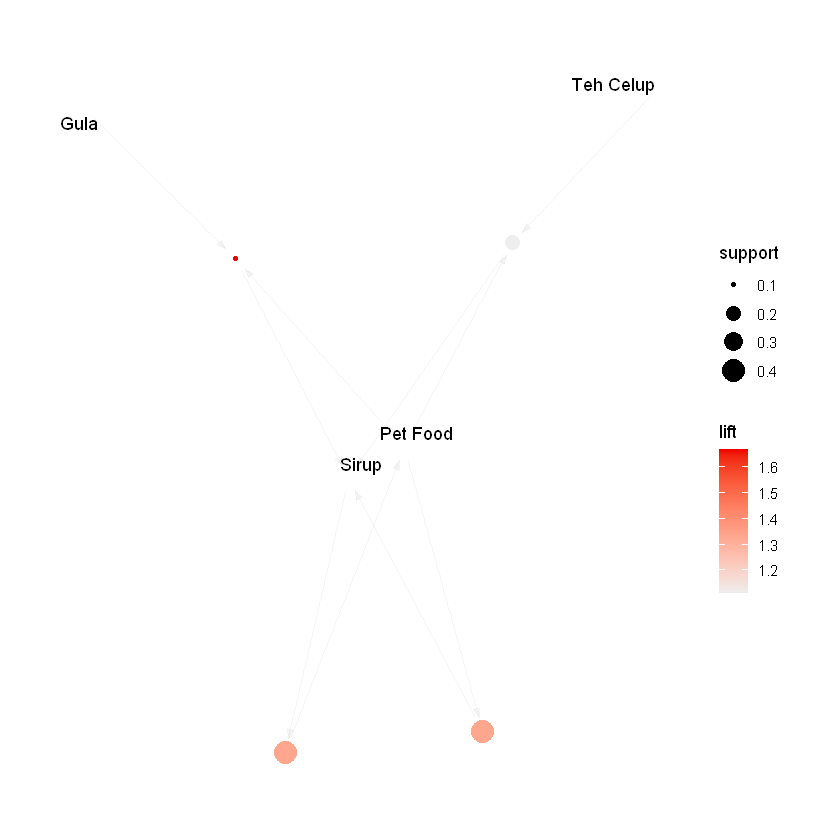

In [58]:
library(arulesViz)
plot(subset(mba, lift>1.1), method="graph")